# **CUSTOMER CHURN PREDICTOR**

## **BUSINESS UNDERSTANDING**

- **Problem statement** – customers leaving/unsubscribing from the telco services after some time.
- **Project aim** – the aim of the project is to find the likelihood of a customer leaving the organization, key indicators of churn as well as some retention strategies that can be implemented to avert this problem.

**Null Hypothesis**- The monthly charges on a customer have no significant effect on whether they will churn.

**Alternative Hypothesis**- The monthly charges on a customer have a significant effect on whether they will churn.

***Key analytical questions***
1) Which gender is most likely to churn?
2) Which gender is likely to pay more for the services monthly?
3) Does the amount a customer is charged monthly have an effect on the contract they procure?
4) What internet service is most likely to have the most loyal customers?
5) Which payment method brings in the most revenue?

### **DATA UNDERSTANDING**

The following describes the columns present in the data:
- **Gender** -- Whether the customer is a male or a female
- **SeniorCitizen** -- Whether a customer is a senior citizen or not
- **Partner** -- Whether the customer has a partner or not (Yes, No)
- **Dependents** -- Whether the customer has dependents or not (Yes, No)
- **Tenure** -- Number of months the customer has stayed with the company
- **Phone Service** -- Whether the customer has a phone service or not (Yes, No)
- **MultipleLines** -- Whether the customer has multiple lines or not
- **InternetService** -- Customer's internet service provider (DSL, Fiber Optic, No)
- **OnlineSecurity** -- Whether the customer has online security or not (Yes, No, No Internet)
- **OnlineBackup** -- Whether the customer has online backup or not (Yes, No, No Internet)
- **DeviceProtection** -- Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport** -- Whether the customer has tech support or not (Yes, No, No internet)
- **StreamingTV** -- Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)
- **Contract** -- The contract term of the customer (Month-to-Month, One year, Two year)
- **PaperlessBilling** -- Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))
- **MonthlyCharges** -- The amount charged to the customer monthly
- **TotalCharges** -- The total amount charged to the customer
- **Churn** -- Whether the customer churned or not (Yes or No)


*Importation*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc     
from dotenv import dotenv_values   

import warnings 

warnings.filterwarnings('ignore')

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('..\.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("user")
password = environment_variables.get("password")

In [3]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"


In [4]:
connection = pyodbc.connect(connection_string)

In [5]:

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [6]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
data.duplicated().sum()

0

In [10]:
# Define the change_bool function
def change_bool(df):
    """
    Returns a DataFrame with True and False entries replaced by Yes and No respectively
    """
    for column in df.columns:
        df[column] = df[column].map(lambda v: "Yes" if v is True else "No" if v is False else v)
    return df
 
# Apply the change_bool function using pipe
data = data.pipe(change_bool)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   object 
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


In [12]:
data_2= pd.read_csv('../data/LP2_Telco-churn-second-2000.csv')
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [13]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [14]:
print(data.columns)
print(data_2.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [15]:
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors= 'coerce')

In [16]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [17]:
train= pd.concat([data,data_2],axis=0)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [19]:
train.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [20]:
train.duplicated().sum()

0

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [22]:
train.describe(include='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
SeniorCitizen,5043,4,No,2525
Partner,5043,2,No,2585
Dependents,5043,2,No,3482
PhoneService,5043,2,Yes,4554
MultipleLines,4774,3,No,2424
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,3,No,2507
OnlineBackup,4392,3,No,2231


In [23]:
columns= train.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
train['SeniorCitizen'] =train['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
train['MulipleLines'] = train['MultipleLines'].replace({'No phone service': 'No'})
train['OnlineSecurity'] = train['OnlineSecurity'].replace({'No internet service': 'No'})
train['OnlineBackup'] = train['OnlineBackup'].replace({'No internet service': 'No'})
train['DeviceProtection'] = train['DeviceProtection'].replace({'No internet service': 'No'})
train['TechSupport'] =train['TechSupport'].replace({'No internet service': 'No'})
train['StreamingTV'] =train['StreamingTV'].replace({'No internet service': 'No'})
train['StreamingMovies'] = train['StreamingMovies'].replace({'No internet service': 'No'})




In [25]:
for column in columns:
    print(f'{column}')
    print(f'{train[column].unique().size}')
    print(f'{train[column].unique()}')

customerID
5043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
2
['Female' 'Male']
SeniorCitizen
2
['No' 'Yes']
Partner
2
['Yes' 'No']
Dependents
2
['No' 'Yes']
tenure
73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
2
['No' 'Yes']
MultipleLines
4
[None 'No' 'Yes' 'No phone service']
InternetService
3
['DSL' 'Fiber optic' 'No']
OnlineSecurity
3
['No' 'Yes' None]
OnlineBackup
3
['Yes' 'No' None]
DeviceProtection
3
['No' 'Yes' None]
TechSupport
3
['No' 'Yes' None]
StreamingTV
3
['No' 'Yes' None]
StreamingMovies
3
['No' 'Yes' None]
Contract
3
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
2
['Yes' 'No']
PaymentMethod
4
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
2069
[ 29.85000038  56.

In [26]:
train['TotalCharges'].unique()

array([  29.85000038, 1889.5       ,  108.15000153, ...,  346.45      ,
        306.6       , 6844.5       ])

In [33]:
train=train.reset_index(drop = True)

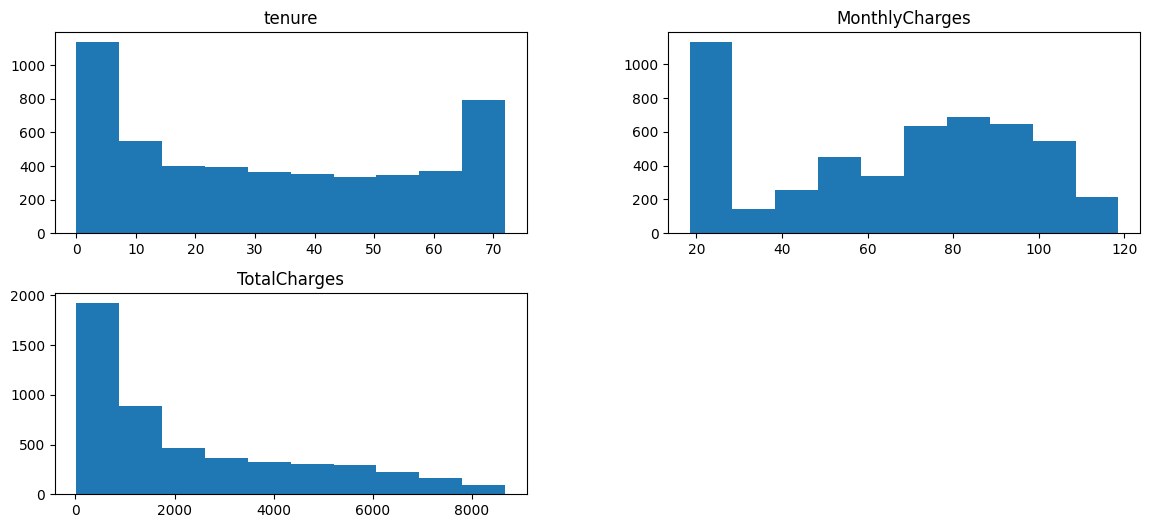

<Figure size 640x480 with 0 Axes>

In [34]:
train.hist(figsize=(14,6),grid=False)
plt.show()
plt.tight_layout()



**Univariate Analysis**

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

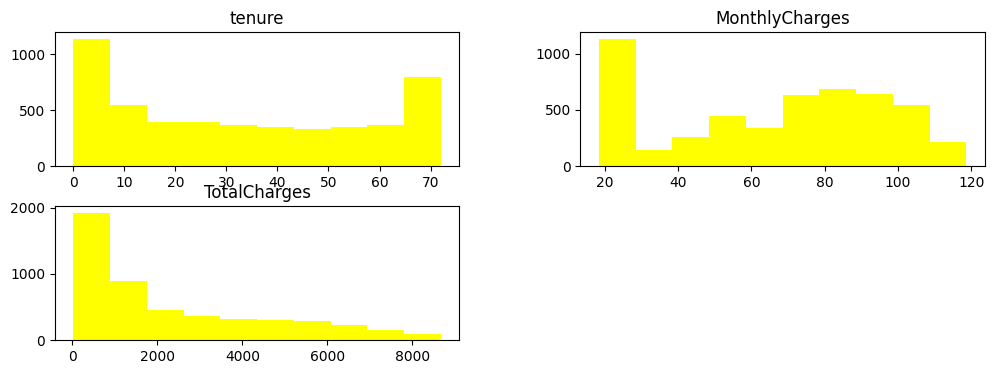

In [35]:
train[['tenure','MonthlyCharges','TotalCharges']].hist(figsize=(12,4),grid=False,color='yellow')



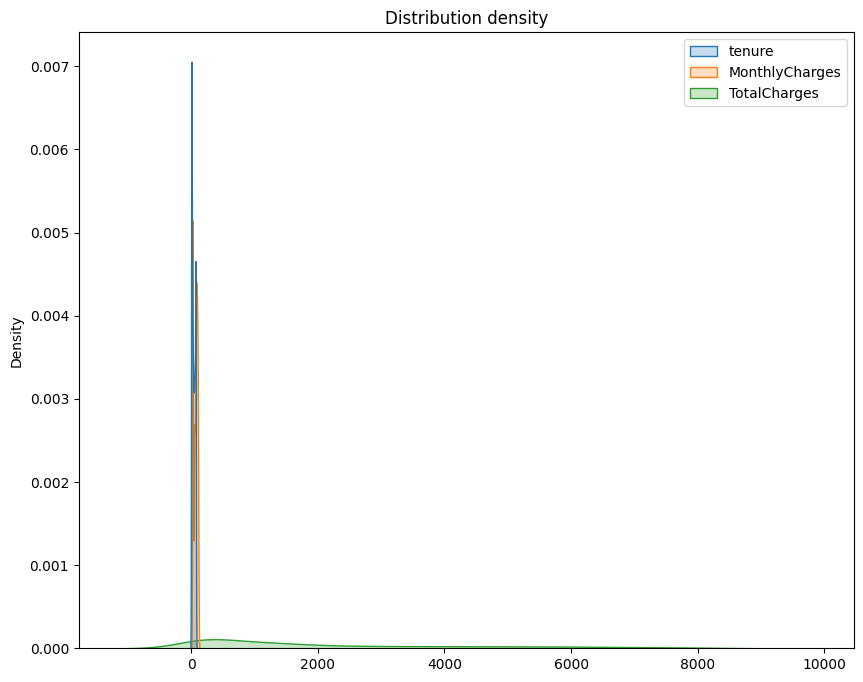

In [36]:
plt.figure(figsize=(10,8))
sns.kdeplot(train,fill=True)
plt.title('Distribution density')
plt.show()


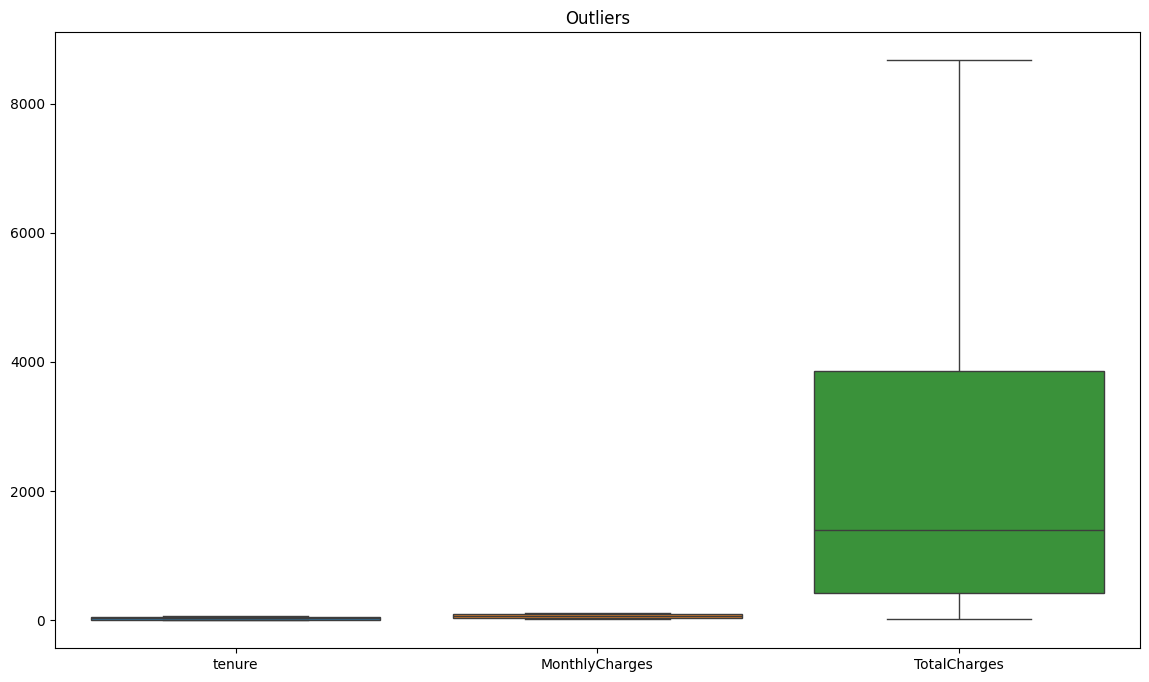

In [37]:
plt.figure(figsize=(14,8))
sns.boxplot(train)
plt.title('Outliers')
plt.show()

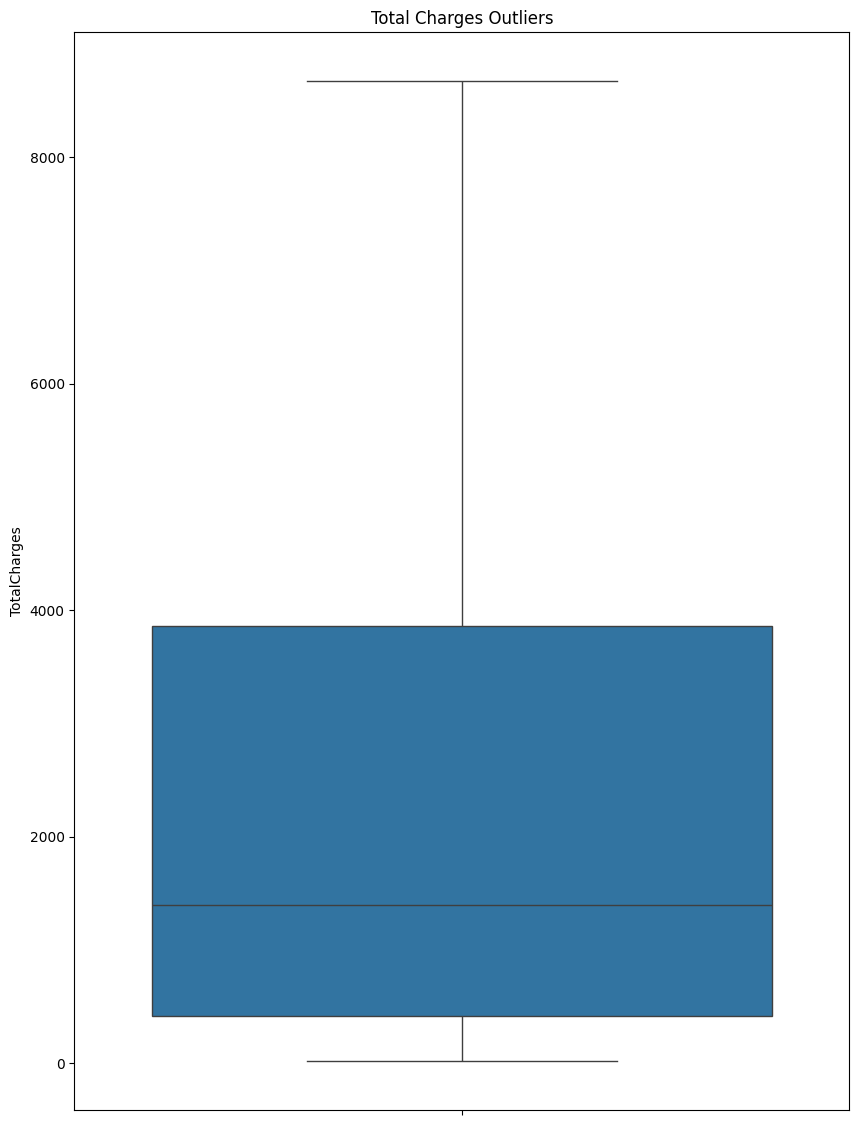

In [38]:
plt.figure(figsize=(10,14))
sns.boxplot(train['TotalCharges'])
plt.title('Total Charges Outliers')
plt.show()

***Key observation***
- The variables are unevenly distributed.
- Totalcharges have a long right tail.
- There are no outliers.

**Bivariate Analysis**

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

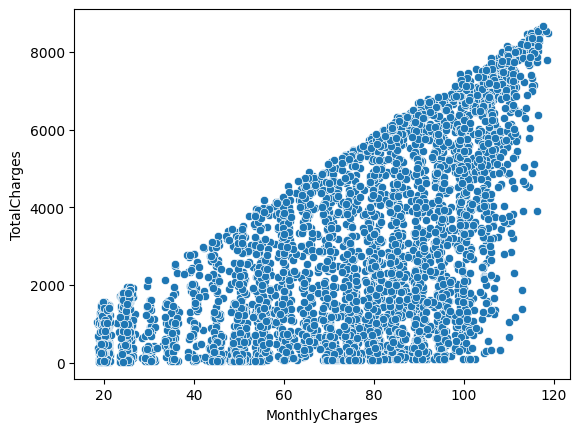

In [39]:
sns.scatterplot(data=train,x='MonthlyCharges', y= 'TotalCharges')
plt.title

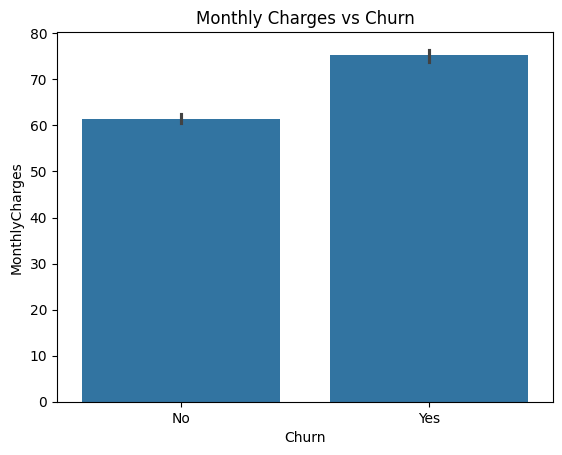

In [43]:
sns.barplot(data = train, x= 'Churn', y= 'MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()


**Multivariate Analysis**

In [40]:
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']
corr_matrix = data[numerical_columns].corr()
corr_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.23024,0.824273
MonthlyCharges,0.230240,1.00000,0.641280
TotalCharges,0.824273,0.64128,1.000000


<Axes: >

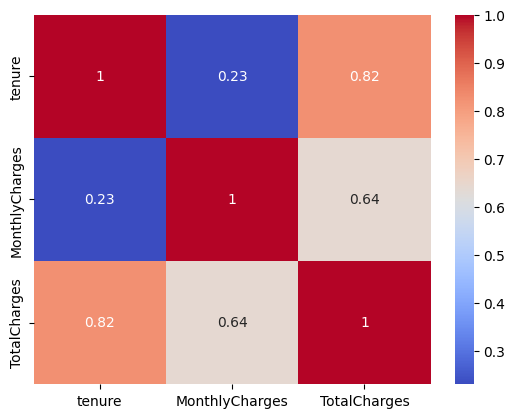

In [41]:
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

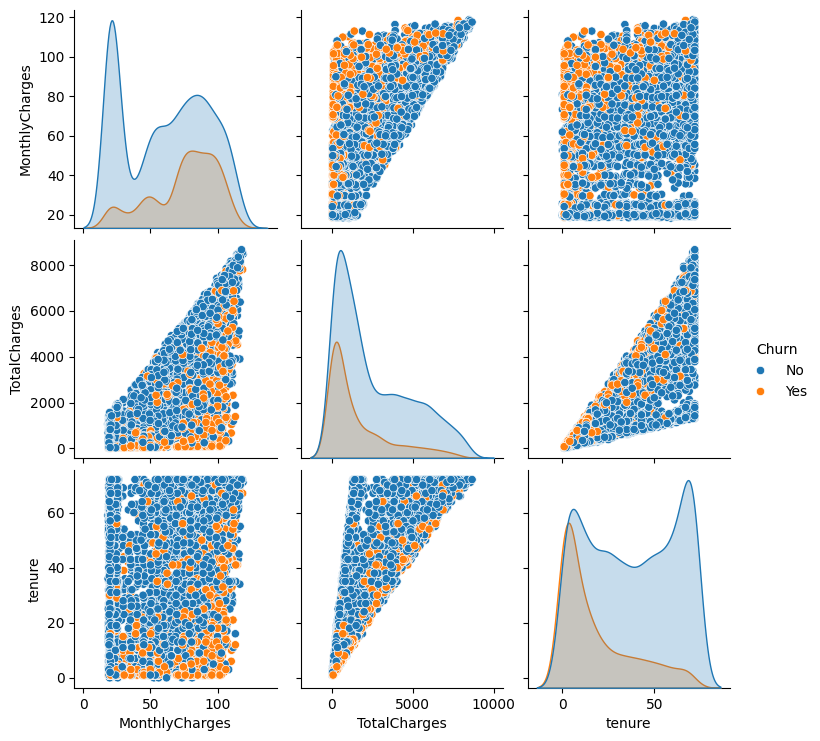

In [42]:
sns.pairplot(train[['MonthlyCharges','TotalCharges','tenure','Churn']], hue = 'Churn')
plt.show()

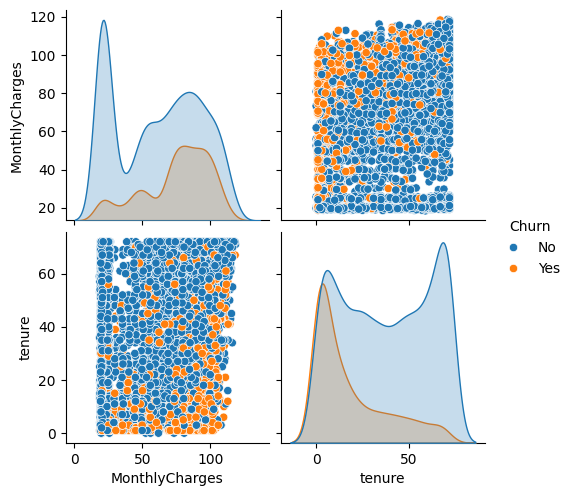

In [35]:
sns.pairplot(train[['MonthlyCharges','tenure','Churn']], hue = 'Churn')
plt.show()

**1) Which gender is most likely to churn?**

In [48]:
Gender_churn = train.groupby('gender')['Churn'].value_counts().unstack()
Gender_churn

Churn,No,Yes
gender,,
Female,1823,661
Male,1883,675


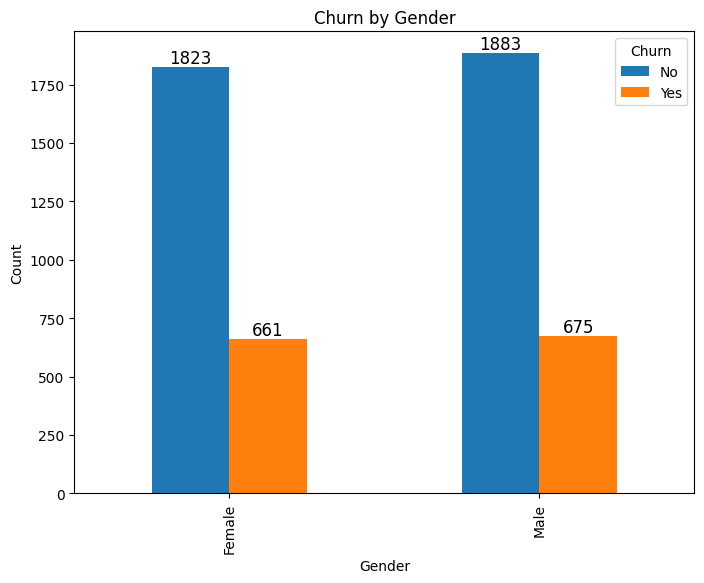

In [50]:
ax=Gender_churn.plot(kind='bar', figsize=(8, 6))
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

**2) Which gender is likely to pay more for the services monthly?**

In [62]:
Gender_Monthlycharges = train.groupby('gender')['MonthlyCharges'].sum()
Gender_Monthlycharges = Gender_Monthlycharges.round(1)
Gender_Monthlycharges

gender
Female    163192.7
Male      165057.3
Name: MonthlyCharges, dtype: float64

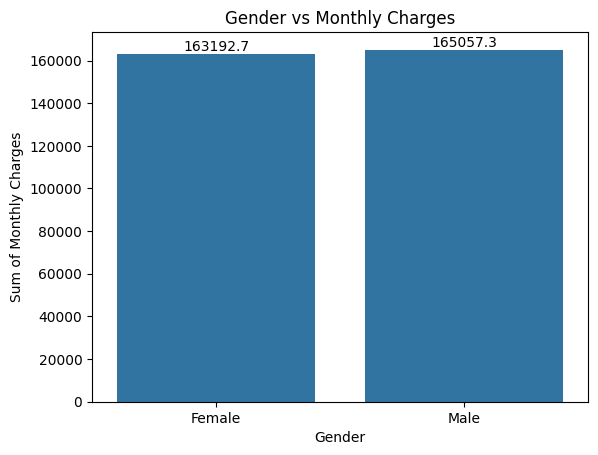

In [61]:
sns.barplot(x=Gender_Monthlycharges.index, y=Gender_Monthlycharges.values)

# Set the title and labels
plt.title('Gender vs Monthly Charges')
plt.xlabel('Gender')
plt.ylabel('Sum of Monthly Charges')

# Add annotations to each bar
for i, p in enumerate(plt.gca().patches):
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 10, '{:1.1f}'.format(height), ha='center', va='bottom')

# Display the plot
plt.show()

**3) Does the amount a customer charged have an effect on the contract they procure?**

In [85]:
monthly_charges_per_contract = train.groupby('Contract')['MonthlyCharges'].sum()
monthly_charges_per_contract

Contract
Month-to-month    183586.600043
One year           69630.999992
Two year           75032.349976
Name: MonthlyCharges, dtype: float64

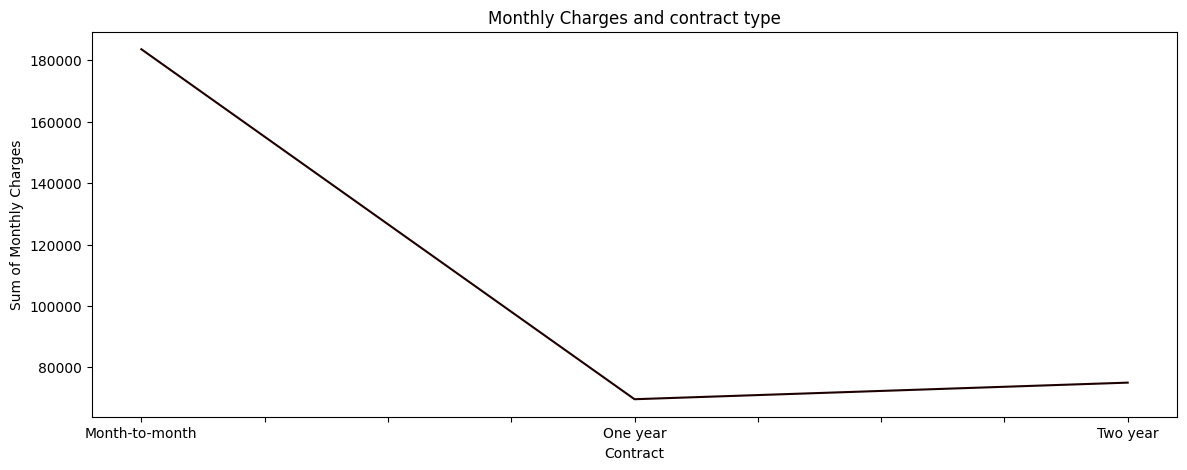

In [92]:
monthly_charges_per_contract.plot(kind = 'line', figsize= (14,5), colormap= 'pink')

# Set the title and labels
plt.title('Monthly Charges and contract type')
plt.xlabel('Contract')
plt.ylabel('Sum of Monthly Charges')
plt.show()


**4) What Internet service is most likely to have the most loyal customers?**

In [130]:
Loyalty_per_Internetservice = train.groupby('InternetService')['Churn'].value_counts().unstack().fillna(0)
Loyalty_per_Internetservice

Churn,No,Yes
InternetService,,
DSL,1406,309
Fiber optic,1296,951
No,1004,76


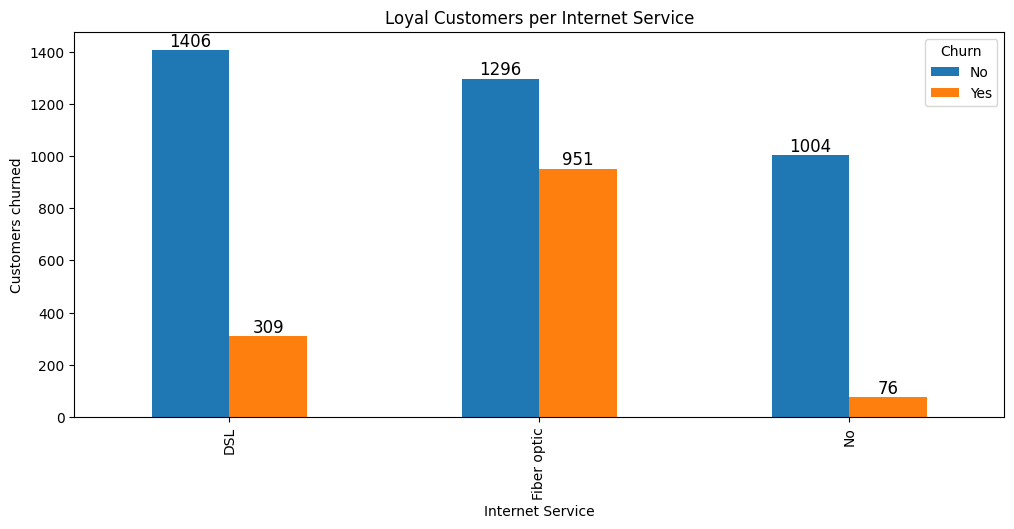

In [143]:
ax = Loyalty_per_Internetservice.plot(kind='bar', figsize=(12, 5))
plt.title('Loyal Customers per Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Customers churned')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()

In [139]:
Revenue_per_paymentmethod = train.groupby('PaymentMethod')['TotalCharges'].sum()
Revenue_per_paymentmethod = (Revenue_per_paymentmethod / 1000).round(1)
Revenue_per_paymentmethod

PaymentMethod
Bank transfer (automatic)    3507.8
Credit card (automatic)      3358.6
Electronic check             3503.7
Mailed check                 1220.8
Name: TotalCharges, dtype: float64

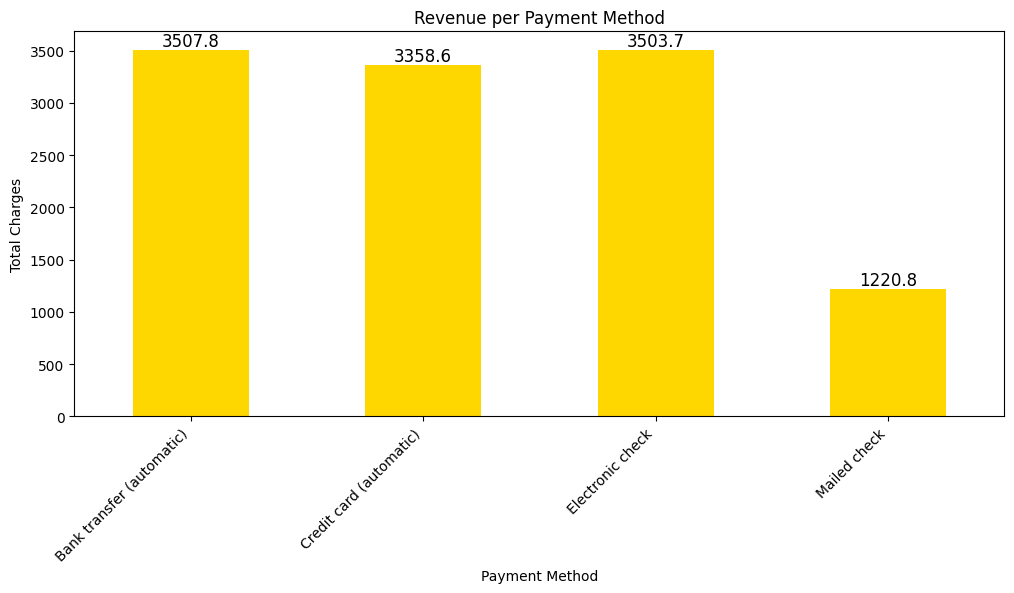

In [146]:
ax = Revenue_per_paymentmethod.plot(kind='bar', figsize=(12, 5), color = 'gold')
plt.title('Revenue per Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Charges')
plt.xticks(rotation = 45, ha = 'right')

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()